CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nnF
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
from utils import get_mnist_data

train_data, test_data = get_mnist_data(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified


CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


CODE BLOCK: 6

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()


<Figure size 640x480 with 0 Axes>

CODE BLOCK: 7

In [7]:
from model import model_1, model_2, model_3

CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [9]:
from utils import train, test
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model_1().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           4,608
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           4,608
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
    

CODE BLOCK: 10

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_1().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 1


Loss=1.2824769020080566 Batch_id=97 Accuracy=41.34: 100%|██████████| 98/98 [00:15<00:00,  6.13it/s]



Test set: Average loss: 1.3636, Accuracy: 5062/10000 (50.62%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 2


Loss=1.1018438339233398 Batch_id=97 Accuracy=56.48: 100%|██████████| 98/98 [00:17<00:00,  5.55it/s]



Test set: Average loss: 1.2438, Accuracy: 5418/10000 (54.18%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 3


Loss=0.9591909050941467 Batch_id=97 Accuracy=62.66: 100%|██████████| 98/98 [00:14<00:00,  6.88it/s]



Test set: Average loss: 1.2182, Accuracy: 5824/10000 (58.24%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 4


Loss=0.934159517288208 Batch_id=97 Accuracy=66.07: 100%|██████████| 98/98 [00:14<00:00,  6.99it/s]



Test set: Average loss: 1.1176, Accuracy: 6043/10000 (60.43%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 5


Loss=0.8542793989181519 Batch_id=97 Accuracy=68.11: 100%|██████████| 98/98 [00:14<00:00,  6.97it/s]



Test set: Average loss: 1.0783, Accuracy: 6277/10000 (62.77%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 6


Loss=0.8734005689620972 Batch_id=97 Accuracy=70.24: 100%|██████████| 98/98 [00:14<00:00,  6.83it/s]



Test set: Average loss: 0.9703, Accuracy: 6655/10000 (66.55%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 7


Loss=0.748378574848175 Batch_id=97 Accuracy=72.01: 100%|██████████| 98/98 [00:14<00:00,  6.81it/s]



Test set: Average loss: 0.9497, Accuracy: 6629/10000 (66.29%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 8


Loss=0.7870006561279297 Batch_id=97 Accuracy=73.29: 100%|██████████| 98/98 [00:14<00:00,  6.84it/s]



Test set: Average loss: 0.9571, Accuracy: 6742/10000 (67.42%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 9


Loss=0.6416004300117493 Batch_id=97 Accuracy=73.94: 100%|██████████| 98/98 [00:14<00:00,  6.91it/s]



Test set: Average loss: 0.9124, Accuracy: 6862/10000 (68.62%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 10


Loss=0.6423435211181641 Batch_id=97 Accuracy=75.21: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s]



Test set: Average loss: 0.7904, Accuracy: 7259/10000 (72.59%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 11


Loss=0.7386485934257507 Batch_id=97 Accuracy=77.62: 100%|██████████| 98/98 [00:14<00:00,  6.93it/s]



Test set: Average loss: 0.7059, Accuracy: 7531/10000 (75.31%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 12


Loss=0.6052672863006592 Batch_id=97 Accuracy=78.67: 100%|██████████| 98/98 [00:14<00:00,  6.94it/s]



Test set: Average loss: 0.7049, Accuracy: 7525/10000 (75.25%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 13


Loss=0.6105436682701111 Batch_id=97 Accuracy=78.85: 100%|██████████| 98/98 [00:14<00:00,  6.92it/s]



Test set: Average loss: 0.7064, Accuracy: 7543/10000 (75.43%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 14


Loss=0.581051230430603 Batch_id=97 Accuracy=79.23: 100%|██████████| 98/98 [00:14<00:00,  6.90it/s]



Test set: Average loss: 0.6856, Accuracy: 7623/10000 (76.23%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 15


Loss=0.5501724481582642 Batch_id=97 Accuracy=79.16: 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]



Test set: Average loss: 0.7230, Accuracy: 7504/10000 (75.04%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 16


Loss=0.5508684515953064 Batch_id=97 Accuracy=79.34: 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]



Test set: Average loss: 0.7005, Accuracy: 7569/10000 (75.69%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 17


Loss=0.6033946871757507 Batch_id=97 Accuracy=79.63: 100%|██████████| 98/98 [00:14<00:00,  6.75it/s]



Test set: Average loss: 0.7078, Accuracy: 7553/10000 (75.53%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 18


Loss=0.5554662942886353 Batch_id=97 Accuracy=79.51: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]



Test set: Average loss: 0.6896, Accuracy: 7604/10000 (76.04%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 19


Loss=0.5244388580322266 Batch_id=97 Accuracy=79.67: 100%|██████████| 98/98 [00:14<00:00,  6.93it/s]



Test set: Average loss: 0.7056, Accuracy: 7589/10000 (75.89%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 20


Loss=0.5759034156799316 Batch_id=97 Accuracy=79.59: 100%|██████████| 98/98 [00:14<00:00,  6.96it/s]



Test set: Average loss: 0.7090, Accuracy: 7575/10000 (75.75%)

Adjusting learning rate of group 0 to 8.0000e-04.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

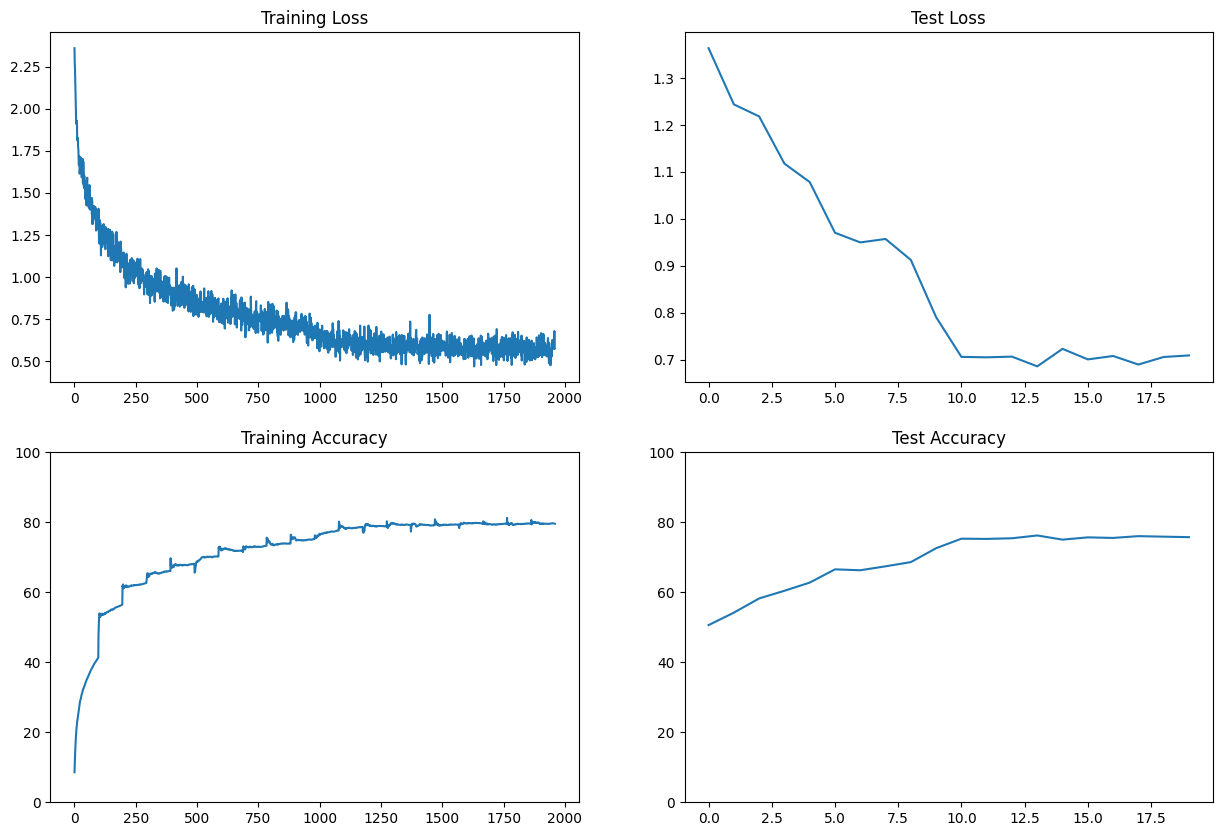

In [11]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([x.cpu().item() for x in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1,0].axis(ymin=0,ymax=100)
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1,1].axis(ymin=0,ymax=100)
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")


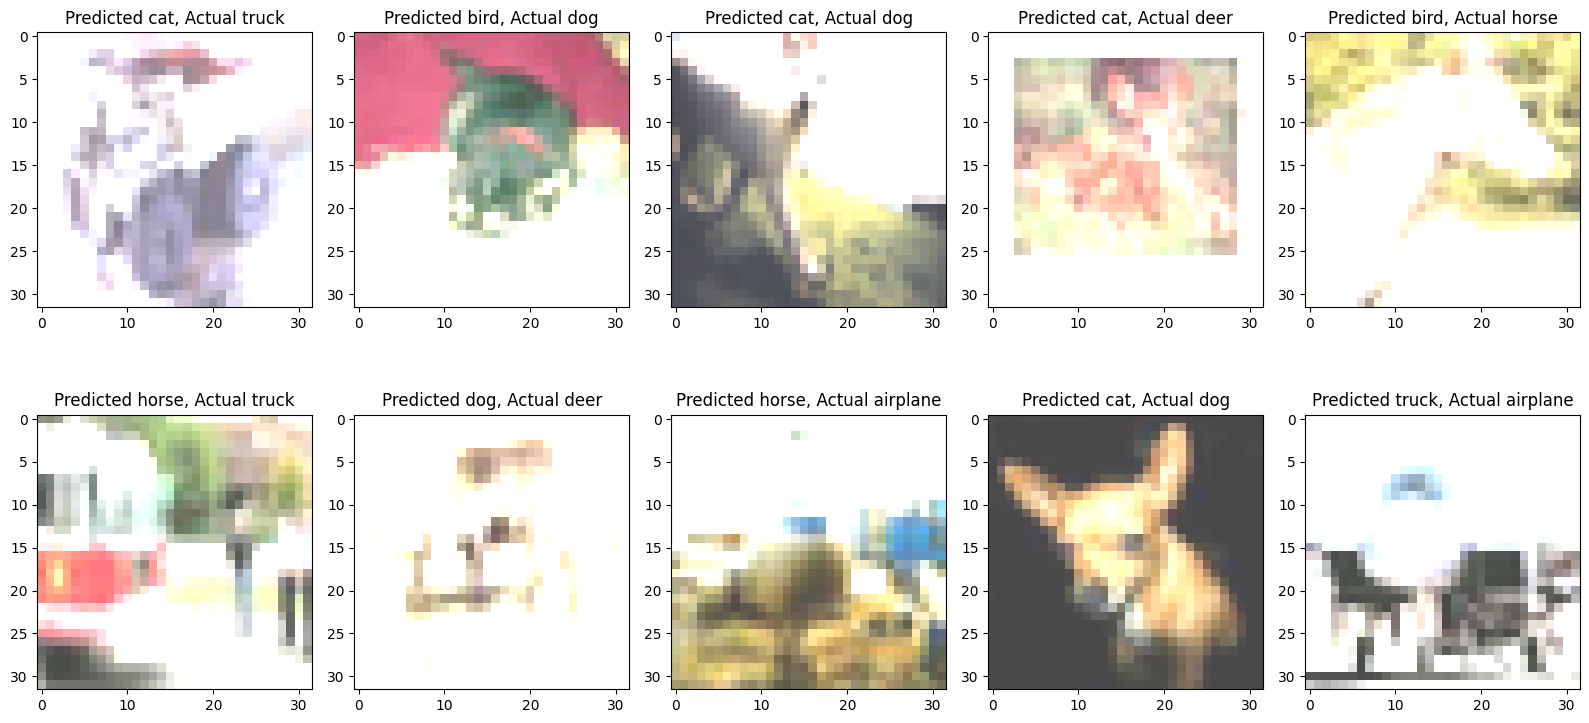

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def get_incorrect_images(model,test_loader,n=10):
  incorrect_images = []
  predicted_labels = []
  correct_labels = []
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    incorrect_items = pred.ne(target.view_as(pred))
    incorrect_indices = incorrect_items.view(-1).nonzero().view(-1)
    predicted_labels.extend([item.item() for item in pred[incorrect_indices[:n-len(incorrect_images)]]])
    correct_labels.extend([item.item() for item in target.view_as(pred)[incorrect_indices[:n-len(incorrect_images)]]])
    incorrect_images.extend([item for item in data[incorrect_indices[:n-len(incorrect_images)]]])
    if len(incorrect_images)==n:
      break
  return incorrect_images,predicted_labels,correct_labels

def imshow(img):
  img = img / 2 + 0.5     # Unnormalize
  npimg = img
  npimg = np.clip(npimg, 0, 1)  # Add this line to clip the values
  return np.transpose(npimg, (1, 2, 0))  # Convert from Tensor image

fig, axes = plt.subplots(2, 5, figsize=(16, 8))

incorrect_images,predicted_labels,correct_labels = get_incorrect_images(model,test_loader,n=10)

for i, image_tensor in enumerate(incorrect_images):
    ax = axes[i // 5, i % 5]  # Get the location of the subplot
    image = image_tensor.cpu().numpy()
    ax.imshow(imshow(image))  # Display the image
    ax.set_title(f"Predicted {class_names[predicted_labels[i]]}, Actual {class_names[correct_labels[i]]}")  # Set the title as the index

plt.tight_layout()  # To provide sufficient spacing between subplots
plt.show()

In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_2().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=13, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 1


Loss=1.7209177017211914 Batch_id=97 Accuracy=24.92: 100%|██████████| 98/98 [00:15<00:00,  6.41it/s]



Test set: Average loss: 1.7377, Accuracy: 3695/10000 (36.95%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 2


Loss=1.5440031290054321 Batch_id=97 Accuracy=40.04: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]



Test set: Average loss: 1.5352, Accuracy: 4315/10000 (43.15%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 3


Loss=1.3879791498184204 Batch_id=97 Accuracy=46.59: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]



Test set: Average loss: 1.4309, Accuracy: 4851/10000 (48.51%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 4


Loss=1.2405611276626587 Batch_id=97 Accuracy=52.00: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]



Test set: Average loss: 1.2746, Accuracy: 5307/10000 (53.07%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 5


Loss=1.1829513311386108 Batch_id=97 Accuracy=56.42: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]



Test set: Average loss: 1.1361, Accuracy: 5934/10000 (59.34%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 6


Loss=1.0317306518554688 Batch_id=97 Accuracy=60.68: 100%|██████████| 98/98 [00:14<00:00,  6.68it/s]



Test set: Average loss: 1.0716, Accuracy: 6167/10000 (61.67%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 7


Loss=1.0274680852890015 Batch_id=97 Accuracy=63.00: 100%|██████████| 98/98 [00:15<00:00,  6.37it/s]



Test set: Average loss: 0.9644, Accuracy: 6562/10000 (65.62%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 8


Loss=0.8845230937004089 Batch_id=97 Accuracy=65.46: 100%|██████████| 98/98 [00:17<00:00,  5.56it/s]



Test set: Average loss: 0.9184, Accuracy: 6719/10000 (67.19%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 9


Loss=0.8952724933624268 Batch_id=97 Accuracy=66.36: 100%|██████████| 98/98 [00:14<00:00,  6.70it/s]



Test set: Average loss: 0.9518, Accuracy: 6602/10000 (66.02%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 10


Loss=0.9583384394645691 Batch_id=97 Accuracy=68.12: 100%|██████████| 98/98 [00:14<00:00,  6.62it/s]



Test set: Average loss: 0.8768, Accuracy: 6884/10000 (68.84%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 11


Loss=0.8701390027999878 Batch_id=97 Accuracy=69.48: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]



Test set: Average loss: 0.8759, Accuracy: 6898/10000 (68.98%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 12


Loss=0.853909432888031 Batch_id=97 Accuracy=70.04: 100%|██████████| 98/98 [00:14<00:00,  6.72it/s]



Test set: Average loss: 0.8309, Accuracy: 7095/10000 (70.95%)

Adjusting learning rate of group 0 to 8.0000e-02.
Epoch 13


Loss=0.8415087461471558 Batch_id=97 Accuracy=71.37: 100%|██████████| 98/98 [00:14<00:00,  6.69it/s]



Test set: Average loss: 0.8102, Accuracy: 7142/10000 (71.42%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 14


Loss=0.7011104226112366 Batch_id=97 Accuracy=74.31: 100%|██████████| 98/98 [00:14<00:00,  6.66it/s]



Test set: Average loss: 0.7555, Accuracy: 7328/10000 (73.28%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 15


Loss=0.7235180735588074 Batch_id=97 Accuracy=74.93: 100%|██████████| 98/98 [00:14<00:00,  6.78it/s]



Test set: Average loss: 0.7495, Accuracy: 7372/10000 (73.72%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 16


Loss=0.6916759610176086 Batch_id=97 Accuracy=75.17: 100%|██████████| 98/98 [00:17<00:00,  5.75it/s]



Test set: Average loss: 0.7536, Accuracy: 7349/10000 (73.49%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 17


Loss=0.7035495042800903 Batch_id=97 Accuracy=75.39: 100%|██████████| 98/98 [00:14<00:00,  6.58it/s]



Test set: Average loss: 0.7398, Accuracy: 7388/10000 (73.88%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 18


Loss=0.7437056303024292 Batch_id=97 Accuracy=75.63: 100%|██████████| 98/98 [00:14<00:00,  6.63it/s]



Test set: Average loss: 0.7431, Accuracy: 7387/10000 (73.87%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 19


Loss=0.7351899743080139 Batch_id=97 Accuracy=75.76: 100%|██████████| 98/98 [00:15<00:00,  6.27it/s]



Test set: Average loss: 0.7340, Accuracy: 7433/10000 (74.33%)

Adjusting learning rate of group 0 to 8.0000e-03.
Epoch 20


Loss=0.6952546238899231 Batch_id=97 Accuracy=75.81: 100%|██████████| 98/98 [00:15<00:00,  6.49it/s]



Test set: Average loss: 0.7397, Accuracy: 7416/10000 (74.16%)

Adjusting learning rate of group 0 to 8.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

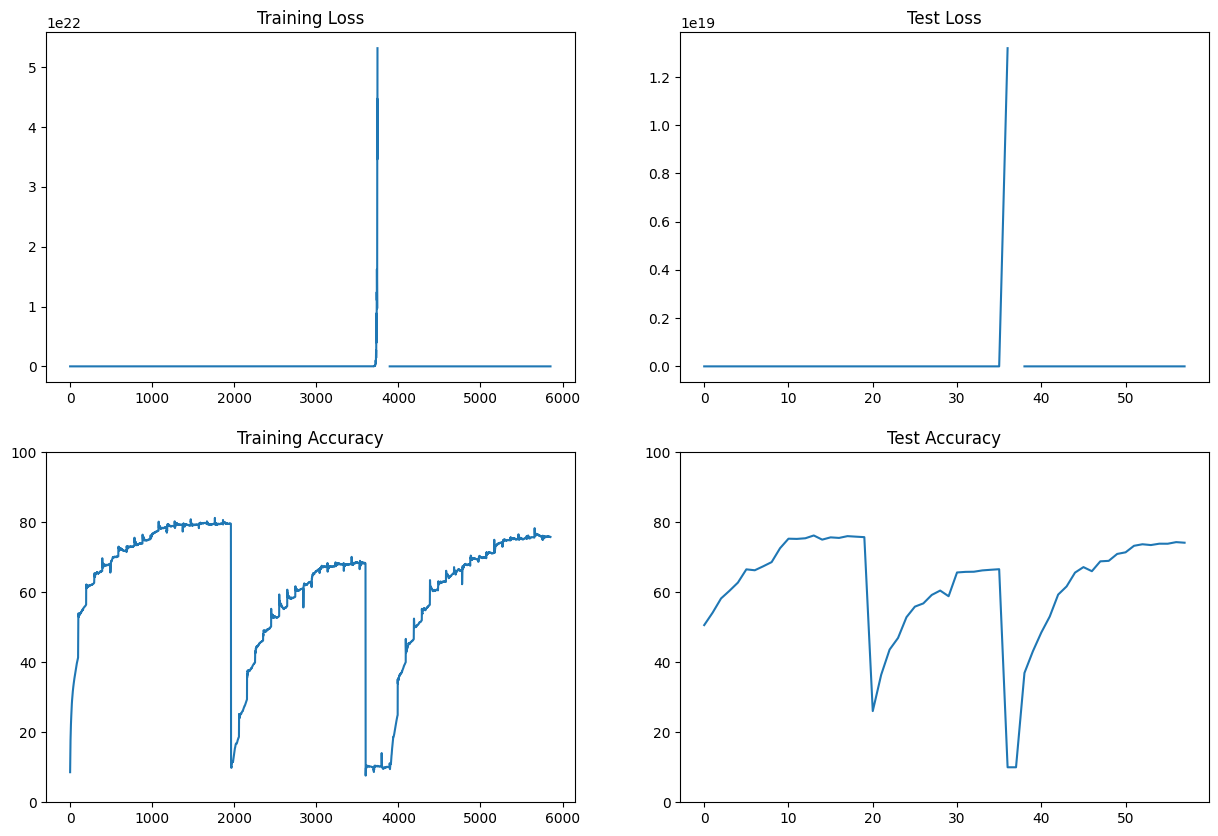

In [16]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([x.cpu().item() for x in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1,0].axis(ymin=0,ymax=100)
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1,1].axis(ymin=0,ymax=100)
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

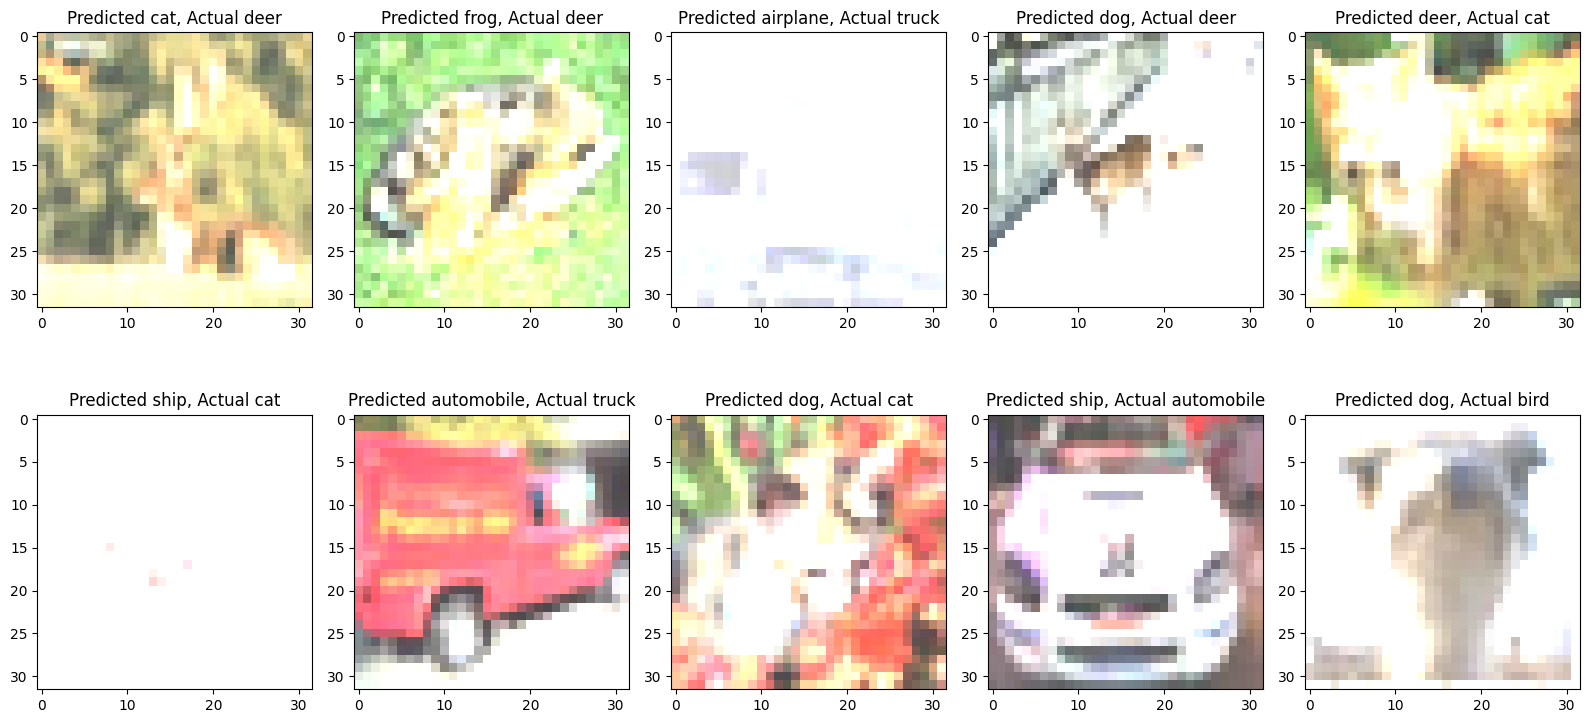

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

incorrect_images,predicted_labels,correct_labels = get_incorrect_images(model,test_loader,n=10)

for i, image_tensor in enumerate(incorrect_images):
    ax = axes[i // 5, i % 5]  # Get the location of the subplot
    image = image_tensor.cpu().numpy()
    ax.imshow(imshow(image))  # Display the image
    ax.set_title(f"Predicted {class_names[predicted_labels[i]]}, Actual {class_names[correct_labels[i]]}")  # Set the title as the index

plt.tight_layout()  # To provide sufficient spacing between subplots
plt.show()

In [18]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_3().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=13, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Loss=1.8840519189834595 Batch_id=97 Accuracy=22.29: 100%|██████████| 98/98 [00:15<00:00,  6.22it/s]



Test set: Average loss: 1.9088, Accuracy: 2982/10000 (29.82%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Loss=1.7145284414291382 Batch_id=97 Accuracy=33.75: 100%|██████████| 98/98 [00:15<00:00,  6.15it/s]



Test set: Average loss: 1.7178, Accuracy: 3639/10000 (36.39%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Loss=1.6225996017456055 Batch_id=97 Accuracy=39.99: 100%|██████████| 98/98 [00:15<00:00,  6.26it/s]



Test set: Average loss: 1.5464, Accuracy: 4386/10000 (43.86%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Loss=1.4779709577560425 Batch_id=97 Accuracy=45.87: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]



Test set: Average loss: 1.4068, Accuracy: 4908/10000 (49.08%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Loss=1.4127564430236816 Batch_id=97 Accuracy=49.77: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]



Test set: Average loss: 1.3021, Accuracy: 5282/10000 (52.82%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Loss=1.2192332744598389 Batch_id=97 Accuracy=53.77: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]



Test set: Average loss: 1.2309, Accuracy: 5578/10000 (55.78%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 7


Loss=1.23622465133667 Batch_id=97 Accuracy=57.32: 100%|██████████| 98/98 [00:15<00:00,  6.21it/s]



Test set: Average loss: 1.1308, Accuracy: 5910/10000 (59.10%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 8


Loss=1.0877317190170288 Batch_id=97 Accuracy=61.12: 100%|██████████| 98/98 [00:15<00:00,  6.47it/s]



Test set: Average loss: 1.0556, Accuracy: 6212/10000 (62.12%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 9


Loss=0.9601233601570129 Batch_id=97 Accuracy=62.83: 100%|██████████| 98/98 [00:16<00:00,  6.03it/s]



Test set: Average loss: 0.9847, Accuracy: 6496/10000 (64.96%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 10


Loss=0.8291788697242737 Batch_id=97 Accuracy=64.19: 100%|██████████| 98/98 [00:16<00:00,  5.90it/s]



Test set: Average loss: 0.9684, Accuracy: 6509/10000 (65.09%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 11


Loss=0.8328458070755005 Batch_id=97 Accuracy=66.64: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]



Test set: Average loss: 1.0106, Accuracy: 6425/10000 (64.25%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 12


Loss=0.9362104535102844 Batch_id=95 Accuracy=67.29:  98%|█████████▊| 96/98 [00:16<00:00,  7.28it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torc


Test set: Average loss: 0.9015, Accuracy: 6791/10000 (67.91%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 13


Loss=0.8619408011436462 Batch_id=86 Accuracy=68.88:  89%|████████▉ | 87/98 [00:13<00:01,  6.97it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Loss=0.8995630741119385 Batch_id=90 Accuracy=68.90:  92%|█████████▏| 90/98 [00:14<00:01,  5.42it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line


Test set: Average loss: 0.8414, Accuracy: 7006/10000 (70.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Loss=0.8009063005447388 Batch_id=83 Accuracy=72.00:  86%|████████▌ | 84/98 [00:13<00:01,  9.39it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
    Traceback (most recent call last):
Exception ignored in: if w.is_alive():  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
    
Traceback (most recent call last):
self._shutdown_workers()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib/python3.10/dist-packages/t


Test set: Average loss: 0.8026, Accuracy: 7163/10000 (71.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Loss=0.7326185703277588 Batch_id=83 Accuracy=72.77:  85%|████████▍ | 83/98 [00:13<00:01,  7.63it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>self._shutdown_workers()

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
        self._shutdown_workers()if w.is_alive():
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers

    if w.is_alive():  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive

  File "/usr/lib/python3.10/multiprocess


Test set: Average loss: 0.7891, Accuracy: 7168/10000 (71.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 16


Loss=0.8472673296928406 Batch_id=71 Accuracy=72.89:  72%|███████▏  | 71/98 [00:12<00:03,  7.81it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
Exception ignored in:   File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520><function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520><function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>    
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__


assert self._parent


Test set: Average loss: 0.7886, Accuracy: 7193/10000 (71.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 17


Loss=0.7962414026260376 Batch_id=79 Accuracy=73.45:  81%|████████  | 79/98 [00:12<00:02,  7.15it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process<function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torc


Test set: Average loss: 0.7830, Accuracy: 7230/10000 (72.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 18


Loss=0.6770432591438293 Batch_id=71 Accuracy=73.85:  72%|███████▏  | 71/98 [00:11<00:03,  8.22it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torc


Test set: Average loss: 0.7799, Accuracy: 7202/10000 (72.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 19


Loss=0.7511059641838074 Batch_id=61 Accuracy=73.43:  62%|██████▏   | 61/98 [00:10<00:07,  5.08it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torc


Test set: Average loss: 0.7762, Accuracy: 7242/10000 (72.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 20


Loss=0.7455998659133911 Batch_id=59 Accuracy=73.56:  60%|██████    | 59/98 [00:10<00:05,  7.36it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f95b0347520>Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in 


Test set: Average loss: 0.7778, Accuracy: 7240/10000 (72.40%)

Adjusting learning rate of group 0 to 1.0000e-02.


Text(0.5, 1.0, 'Test Accuracy')

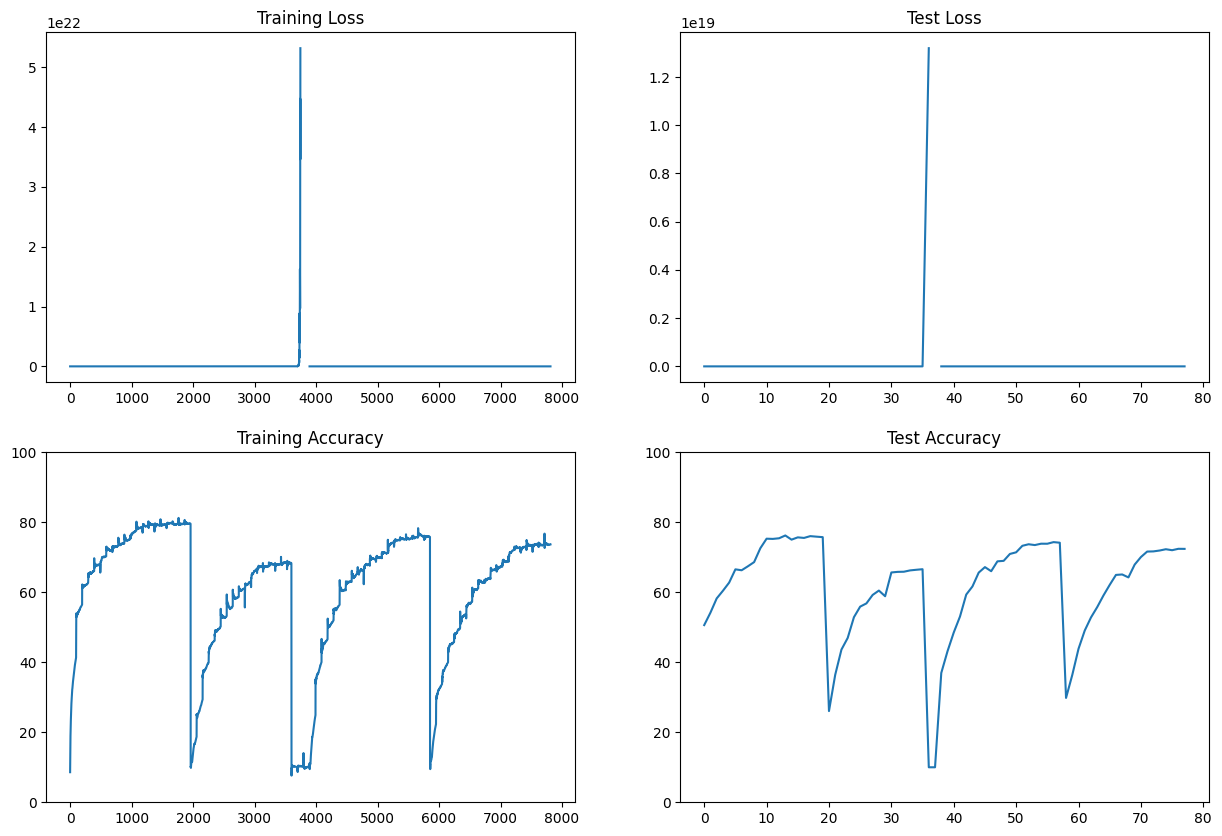

In [19]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([x.cpu().item() for x in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1,0].axis(ymin=0,ymax=100)
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1,1].axis(ymin=0,ymax=100)
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

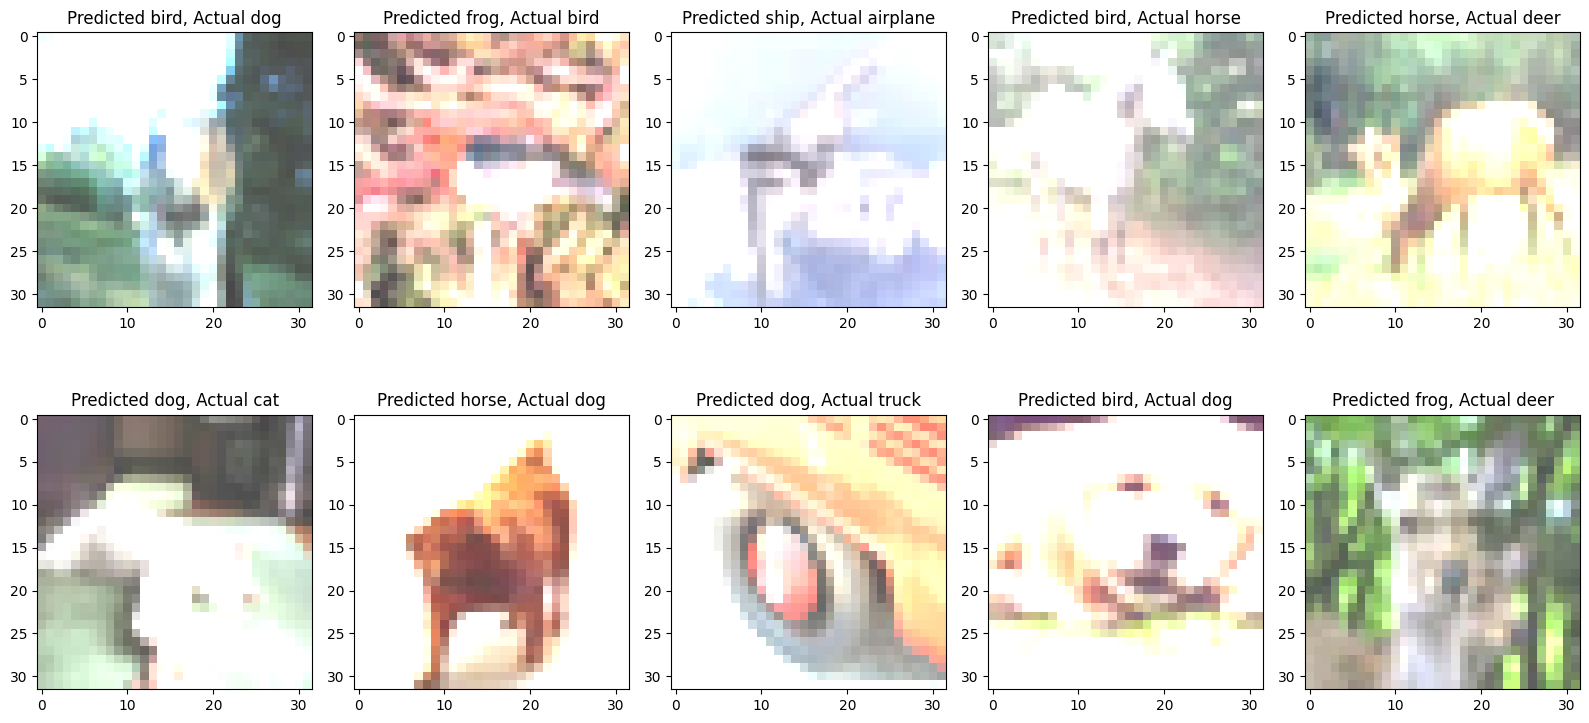

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

incorrect_images,predicted_labels,correct_labels = get_incorrect_images(model,test_loader,n=10)

for i, image_tensor in enumerate(incorrect_images):
    ax = axes[i // 5, i % 5]  # Get the location of the subplot
    image = image_tensor.cpu().numpy()
    ax.imshow(imshow(image))  # Display the image
    ax.set_title(f"Predicted {class_names[predicted_labels[i]]}, Actual {class_names[correct_labels[i]]}")  # Set the title as the index

plt.tight_layout()  # To provide sufficient spacing between subplots
plt.show()